In [1]:
# import necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import pickle

from sklearn.metrics import roc_auc_score, roc_curve, auc
from sklearn.metrics import precision_recall_curve, average_precision_score
from sklearn.metrics import confusion_matrix

import warnings
warnings.filterwarnings('ignore')

In [2]:
# read model pickle files
with open('best_model.pickle', 'rb') as file:
    best_model = pickle.load(file)

In [3]:
# get training and test data
X_train = pd.read_csv('X_train.csv')
X_train.index = X_train['Unnamed: 0']
X_train = X_train.drop(['Unnamed: 0'], axis=1)
X_train.index.name = ''

y_train = pd.read_csv('y_train.csv')
y_train.index = y_train['Unnamed: 0']
y_train = y_train.drop(['Unnamed: 0'], axis=1)
y_train.index.name = ''

X_test = pd.read_csv('X_test.csv')
X_test.index = X_test['Unnamed: 0']
X_test = X_test.drop(['Unnamed: 0'], axis=1)
X_test.index.name = ''

y_test = pd.read_csv('y_test.csv')
y_test.index = y_test['Unnamed: 0']
y_test = y_test.drop(['Unnamed: 0'], axis=1)
y_test.index.name = ''

Before evaluating its performance on test set, I retrained it on the entire training set (training + validation set) and recognized it as the final model.

In [4]:
# retrain best model on entire training set
final_model = best_model.fit(X_train, y_train)

## ROC curve on test set

I evaluated performance of the final model on test set based on AUC of the ROC curve. From the ROC curve below, the AUC on test set is 0.842, which is slightly smaller than the AUC on validation set (0.863). It indicates that very little overfitting has occurred.

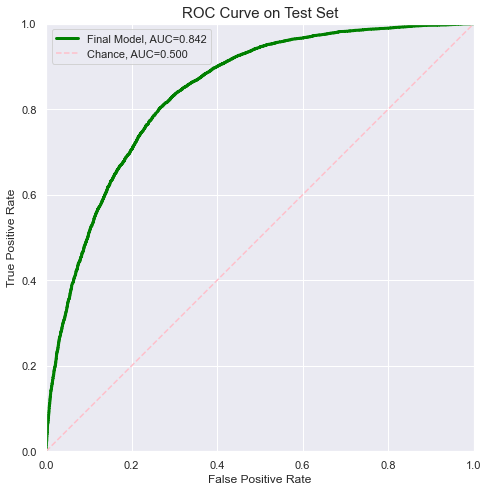

In [7]:
# initialize plot
plt.figure(figsize=(16,7))

# plot ROC curve
pre = final_model.predict_proba(X_test)[:,1]
fpr, tpr, _ = roc_curve(y_test, pre)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, color='green', linewidth=3, label='Final Model, AUC={:.3f}'.format(roc_auc))

# plot the chance diagonal 
plt.plot((0,1),(0,1),color='pink', linestyle='--', label='Chance, AUC=0.500')
    
# add elements to plot
plt.axis('square')
plt.xlim(0,1)
plt.ylim(0,1)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve on Test Set', fontsize=15)
plt.legend()

# show plot
plt.tight_layout()
plt.show()

## PR curve on test set

I evaluated performance of the final model on test set based on AP (average precision) of the PR (precision-recall) curve. From the PR curve below, the AP is 0.827, which is a lot higher than that of the chance line (0.497).

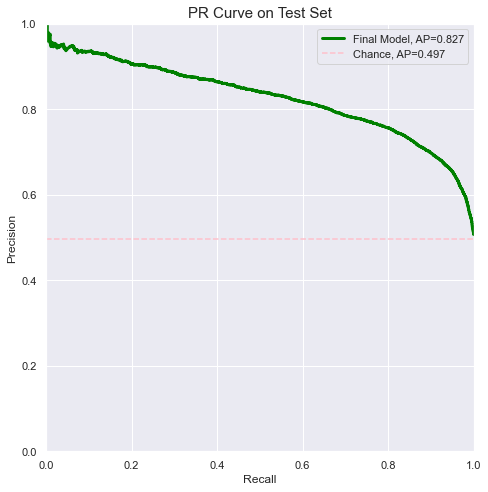

In [10]:
# initialize plot
plt.figure(figsize=(16,7))

# plot PR curve
pre = final_model.predict_proba(X_test)[:,1]
precision, recall, _ = precision_recall_curve(y_test, pre)
ap = average_precision_score(y_test, pre)
plt.plot(recall, precision, color='green', linewidth=3, label='Final Model, AP={:.3f}'.format(ap))

# plot the chance line 
frac = len(np.where(y_train==1)[0])/(len(y_train))
plt.plot((0,1), (frac,frac), color='pink', linestyle='--', label='Chance, AP={:.3f}'.format(frac))
    
# add elements to plot
plt.axis('square')
plt.xlim(0,1)
plt.ylim(0,1)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('PR Curve on Test Set', fontsize=15)
plt.legend()

# show plot
plt.tight_layout()
plt.show()

## Confusion matrix on test set

I evaluated performance of the final model on test set based on the confusion matrix, as well as true positive rate, false positive rate, true negative rate, false negative rate and accuracy. From the outputs below, all the values are sufficiently satisfying, with true positive rate (0.809), false positive rate (0.274), true negative rate (0.726), false negative rate (0.191) precision(0.752) and accuracy (0.768).

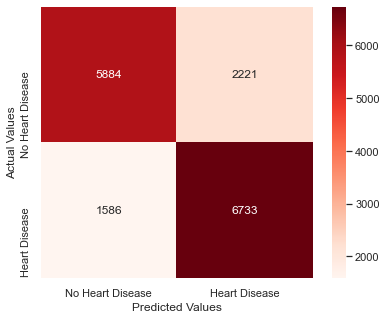

In [14]:
# create a confusion matrix on test set (actual number)
y_pred = final_model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(7,5))
ax = sns.heatmap(cm, fmt='d', annot=True, square=True, cmap='Reds')

ax.set_xlabel('Predicted Values')
ax.set_ylabel('Actual Values');
ax.xaxis.set_ticklabels(['No Heart Disease','Heart Disease'])
ax.yaxis.set_ticklabels(['No Heart Disease','Heart Disease'])

plt.show()

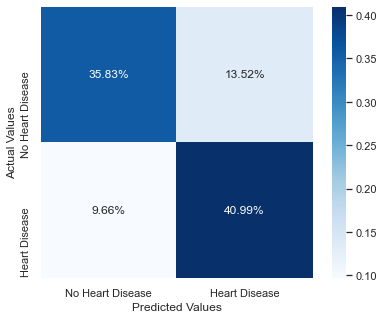

In [12]:
# create a confusion matrix on test set (percentage)
y_pred = final_model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(7,5))
ax = sns.heatmap(cm/np.sum(cm), fmt='.2%', annot=True, square=True, cmap='Blues')

ax.set_xlabel('Predicted Values')
ax.set_ylabel('Actual Values');
ax.xaxis.set_ticklabels(['No Heart Disease','Heart Disease'])
ax.yaxis.set_ticklabels(['No Heart Disease','Heart Disease'])

plt.show()

In [17]:
# Create a dataframe to show rates
tpr = cm[1][1]/cm.sum(axis=1)[1]
fpr = cm[0][1]/cm.sum(axis=1)[0]
tnr = cm[0][0]/cm.sum(axis=1)[0]
fnr = cm[1][0]/cm.sum(axis=1)[1]
precision = cm[1][1]/cm.sum(axis=0)[1]
acc = (cm[0][0]+cm[1][1])/cm.sum()

rates = [[tpr],[fpr],[tnr],[fnr],[precision],[acc]]
df_rates = pd.DataFrame(data, columns=['Value'],
                       index=['True Positive Rate','False Positive Rate',
                              'True Negative Rate','False Negative Rate',
                              'Precision','Accuracy'])
df_rates

,Value
True Positive Rate,0.809352
False Positive Rate,0.274028
True Negative Rate,0.725972
False Negative Rate,0.190648
Precision,0.751954
Accuracy,0.768205
